In [9]:
import sys
import json
import pandas as pd
import numpy as np
print(pd.__version__)

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

1.4.0


In [2]:
# PATH_TO_PROFILE = 'bsi_zoo/data/benchmark_data_CC120264_fixed.pkl'
PATH_TO_PROFILE_FIXED = '/home/anujanegi/tj/bdsg/BSI-Zoo/bsi_zoo/data/benchmark_data_CC120264_fixed.pkl'
PATH_TO_PROFILE_FREE = '/home/anujanegi/tj/bdsg/BSI-Zoo/bsi_zoo/data/benchmark_data_CC120264_free.pkl'
METRIC_NAMES = ['euclidean_distance', 'mse', 'emd', 'f1']

In [3]:
df_fixed = pd.read_pickle(PATH_TO_PROFILE_FIXED)
df_free = pd.read_pickle(PATH_TO_PROFILE_FREE)
df_results = pd.concat([df_fixed, df_free])
df_results

,estimator,euclidean_distance,mse,emd,f1,alpha,cov_type,n_orient,n_sensors,n_sources,n_times,nnz,orientation_type,path_to_leadfield,estimator__alpha
0,iterative_L1,0.063010,0.000244,0.035116,0.666667,0.9,diag,3,50,200,10,2,fixed,bsi_zoo/tests/data/lead_field_CC120264.npz,0.20
1,iterative_L1,0.063010,0.000244,0.035116,0.666667,0.9,diag,3,50,200,10,2,fixed,bsi_zoo/tests/data/lead_field_CC120264.npz,0.10
2,iterative_L1,0.015786,0.000254,0.028052,0.400000,0.9,diag,3,50,200,10,2,fixed,bsi_zoo/tests/data/lead_field_CC120264.npz,0.01
3,iterative_L1,0.079649,0.000283,0.057779,0.000000,0.9,diag,3,50,200,10,2,fixed,bsi_zoo/tests/data/lead_field_CC120264.npz,0.20
4,iterative_L1,0.079649,0.000287,0.057779,0.000000,0.9,diag,3,50,200,10,2,fixed,bsi_zoo/tests/data/lead_field_CC120264.npz,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,gamma_map,0.000000,0.000405,0.032400,0.000853,0.4,full,3,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120264.npz,0.10
146,gamma_map,0.000000,0.000405,0.032400,0.000853,0.4,full,3,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120264.npz,0.01
147,gamma_map,0.000000,0.001376,0.033570,0.000853,0.4,full,3,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120264.npz,0.20
148,gamma_map,0.000000,0.001376,0.033570,0.000853,0.4,full,3,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120264.npz,0.10


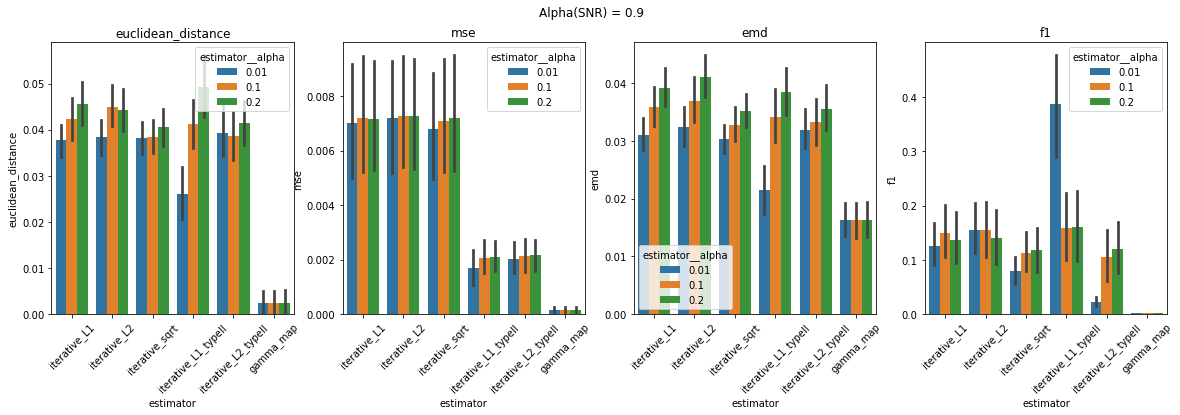

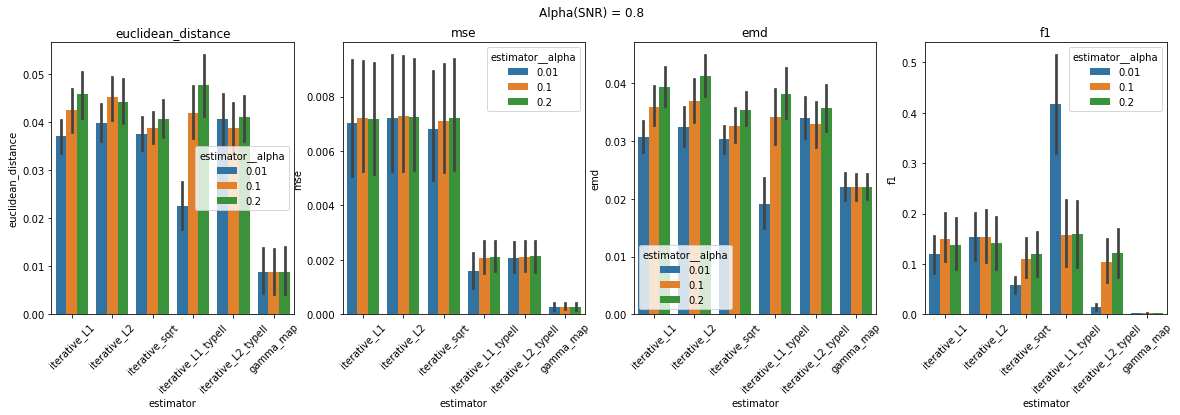

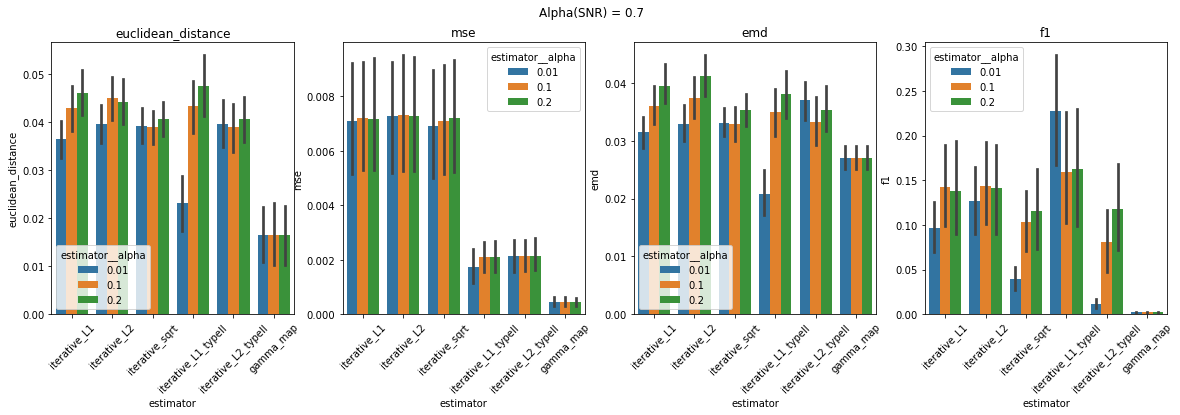

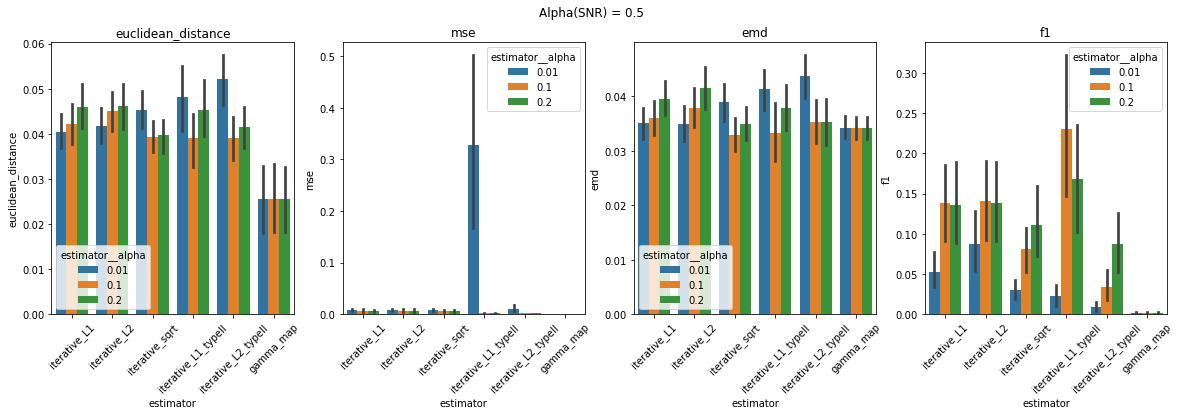

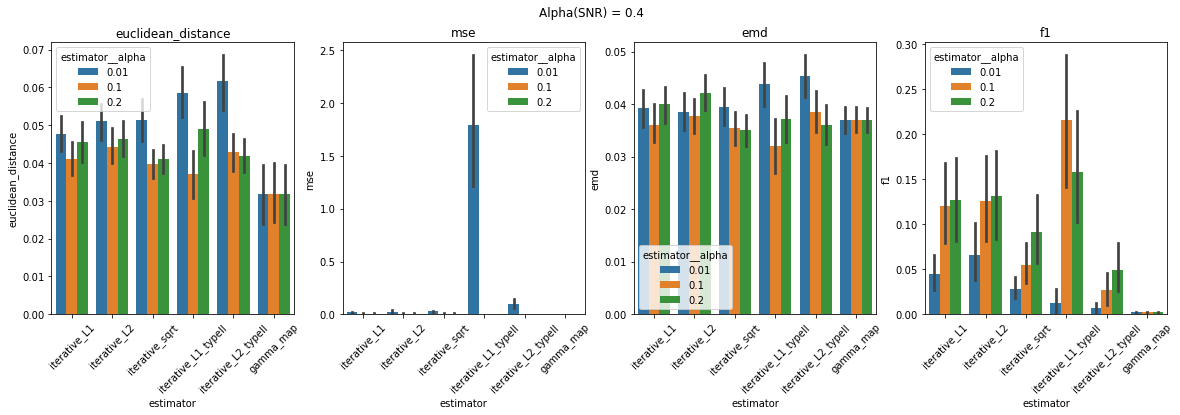

In [42]:
for alpha in df_results["alpha"].unique():
    fig, ax = plt.subplots(1, len(METRIC_NAMES), figsize=(20, 5))
    for i, metric in enumerate(METRIC_NAMES):
        this_df_results = df_results[df_results["alpha"] == alpha]
        sns.barplot(
            data=this_df_results, x="estimator", y=metric, hue="estimator__alpha", ax=ax[i]
        )
        ax[i].set_title(f"{metric}")
        ax[i].tick_params('x', labelrotation=45)

    fig.suptitle(f'Alpha(SNR) = {alpha}')

plt.show()

<Figure size 432x288 with 0 Axes>

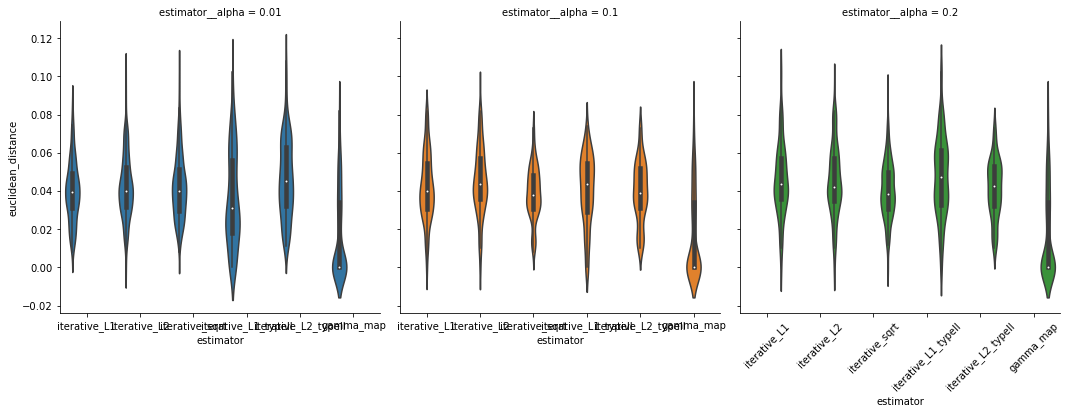

<Figure size 432x288 with 0 Axes>

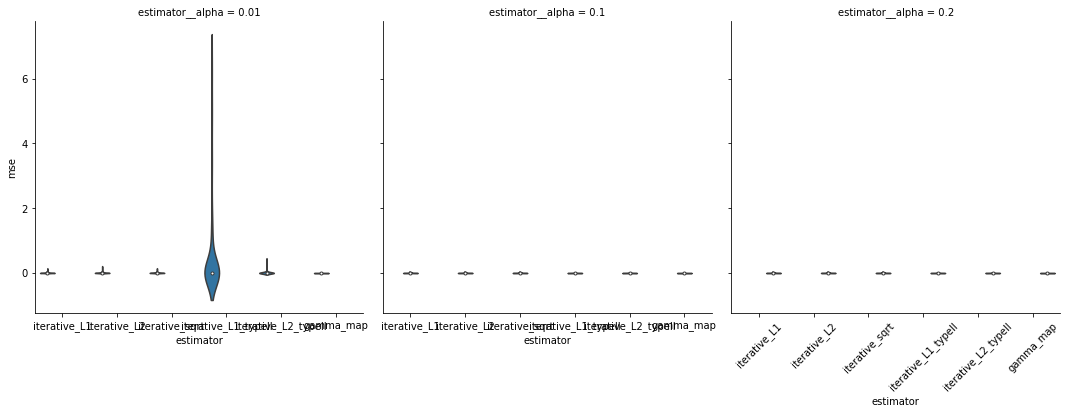

<Figure size 432x288 with 0 Axes>

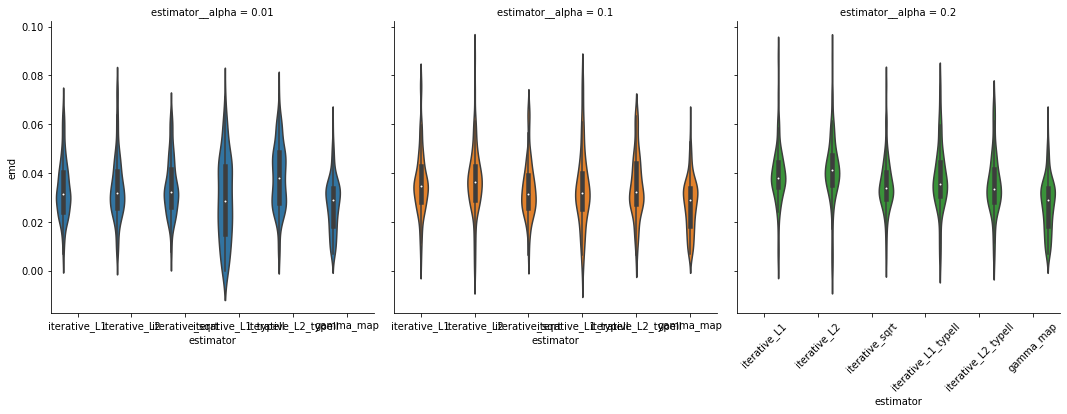

<Figure size 432x288 with 0 Axes>

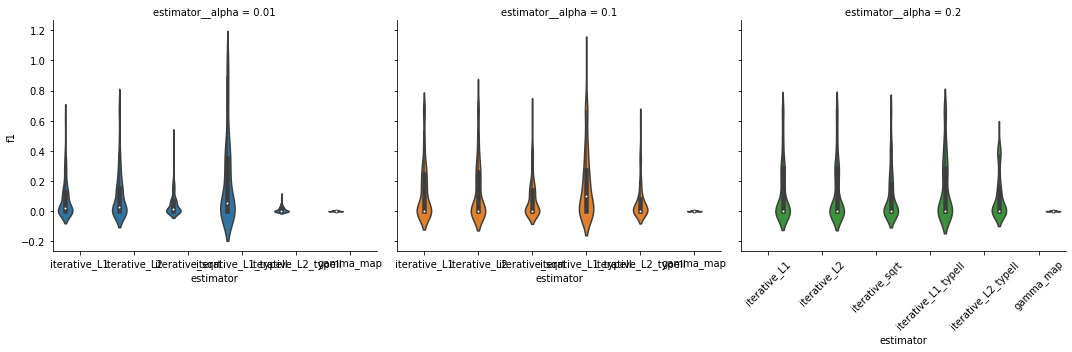

In [54]:
for metric in METRIC_NAMES:
    plt.figure()
    sns.catplot(x="estimator", y=metric, hue="estimator__alpha", data=df_results, ci="sd", kind="violin", col="estimator__alpha")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
def draw_phase_map(val_map, best_map, meth_lab, xlabels, ylabels) :
    #creation of the figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # color map
    #cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
    myColors = ((0.8, 0.0, 0.0, 0.5), (0.0, 0.8, 0.0, 0.5), (0.0, 0.0, 0.8, 0.5),(0.8, 0.8, 0.0, 0.5),(0.8, 0.0, 0.8, 0.5),(0.0, 0.8, 0.8, 0.5))
    # TODO : Find a better way to generate the right amount of colors
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors[:len(meth_lab)], len(myColors))

    # plot heatmap
    #sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
    #           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
    #           cbar_kws={"shrink": .8}, square=True)
    ax = sb.heatmap(best_map, annot=val_map, 
            linewidths=5, cmap=cmap, 
            cbar_kws={"shrink": .8,'label': 'methods'}, square=True)
    
    # Manually specify colorbar labelling after it's been generated
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks(np.arange(len(meth_lab)))
    colorbar.set_ticklabels(meth_lab)

    # ticks
    plt.yticks(plt.yticks()[0], labels=ylabels, rotation=0)
    plt.ylabel('nnz')
    plt.xticks(plt.xticks()[0], labels=xlabels)
    plt.xlabel('alpha')

    # title
    title = 'Phase Diagram of Metric EMD\nWith a standard Leadfield\n'
    plt.title(title, loc='left', fontsize=18)

    # Drawing frontier
    #sb.lineplot([0,1],[1,1])

    plt.show()

    return 

def select_set(df,orient,est_alpha):
    return df.loc[(df['orientation_type'] == orient) & (df['estimator__alpha'] == est_alpha)]

def df_to_matrix(df,alpha_set,nnz_set,metric):
    mat_from_df = np.zeros((len(nnz_set),len(alpha_set)))
    for i in range(len(nnz_set)):
        for j in range(len(alpha_set)):
            mat_from_df[i,j] = df[(df['nnz'] == nnz_set[i]) & (df['alpha'] == alpha_set[j])][metric]
    return mat_from_df

def read_data(df, query):
    subdf = select_set(df,query[0],query[1])

    alpha_set = np.sort(subdf['alpha'].unique())
    nnz_set = np.sort(subdf['nnz'].unique())
    estimators = subdf['estimator'].unique()

    val = df_to_matrix(subdf.loc[(subdf['estimator'] == estimators[0])],alpha_set,nnz_set,query[2])
    phase_map = np.zeros((len(nnz_set),len(alpha_set)))

    for k in range(1,len(estimators)) :
        estimator = estimators[k]
        matrix = df_to_matrix(subdf.loc[(subdf['estimator'] == estimator)],alpha_set,nnz_set,query[2])
        mask = matrix<val
        val[mask] = matrix[mask]
        phase_map[mask] = k
    
    draw_phase_map(val,phase_map,estimators,alpha_set,nnz_set)
    return val

In [8]:
read_data(df_results,['fixed',0.2,'f1'])

ValueError: setting an array element with a sequence.